# Python-Pandas Plot
Dataset - https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

## Pandas plot arguements

DataFrame.plot(*args, **kwargs)[source]

Arguements
- x
- y
- kind
    - ‘line’ : line plot (default)
    - ‘bar’ : vertical bar plot
    - ‘barh’ : horizontal bar plot
    - ‘hist’ : histogram
    - ‘box’ : boxplot
    - ‘kde’ : Kernel Density Estimation plot
    - ‘density’ : same as ‘kde’
    - ‘area’ : area plot
    - ‘pie’ : pie plot
    - ‘scatter’ : scatter plot (DataFrame only)
    - ‘hexbin’ : hexbin plot (DataFrame only)
- ax
- subplots
- sharex
- sharey
- layout
- figsize - a tuple (width, height) in inches
- use_index - bool, default True
- title - str or list (List is used for subplots)
- grid
- legend - bool or {‘reverse’}
- style
- logx
- logy
- loglog
- xticks
- yticks
- xlim
- ylim
- xlabel
- ylabel
- rot
- fontsize
- colormap
- colorbar
- position
- table
- yerr
- xerr
- stacked
- sort_columns
- secondary_y
- mark_right
- include_bool
- backend
- **kwargs

In [1]:
import pandas as pd

In [2]:
# 1. Loading the data from a csv file
df = pd.read_csv("brain_stroke.csv")

In [3]:
# 2. Shape of a dataframe
df.shape

(4981, 11)

In [4]:
# 3. Head and Tail of the data frame
df.head(n=10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


## **1. Scatter Plot - It can be created using two ways**

- df.plot(x = 'col1', y = 'col2', kind = 'scatter')
- df.plot.scatter(x = 'col1', y = 'col2')
- Other important arguments are : alpha-transparency, color-color, s-size, marker-marker type

<Axes: title={'center': 'scatter plot between age and avg glucose level'}, xlabel='Age', ylabel='Avg Glucose Level'>

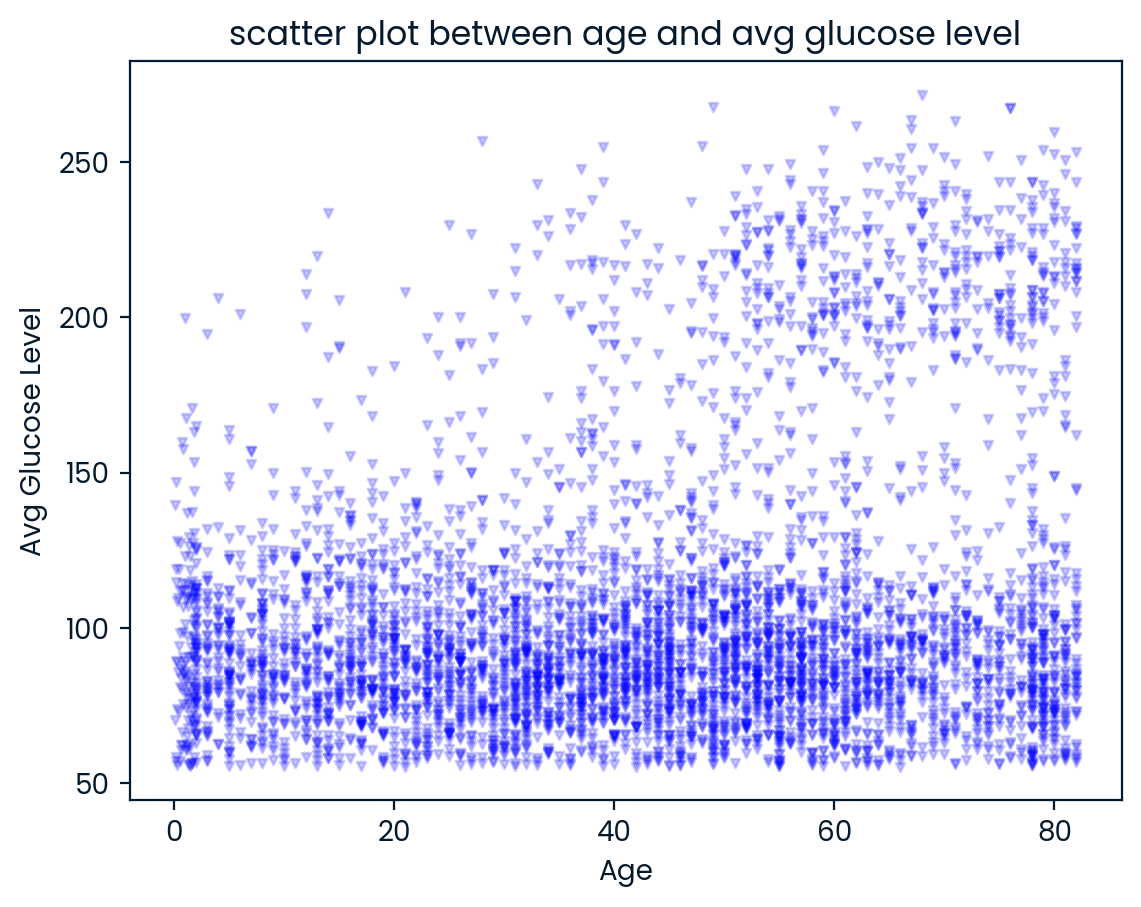

In [21]:
df.plot(x = 'age', y = 'avg_glucose_level', kind = 'scatter', alpha = 0.2, color = 'blue', s=10, marker = "v", 
        title = 'scatter plot between age and avg glucose level',
        xlabel = 'Age', ylabel = 'Avg Glucose Level')

<Axes: title={'center': 'scatter plot between bmi and avg glucose level'}, xlabel='BMI', ylabel='Avg Glucose Level'>

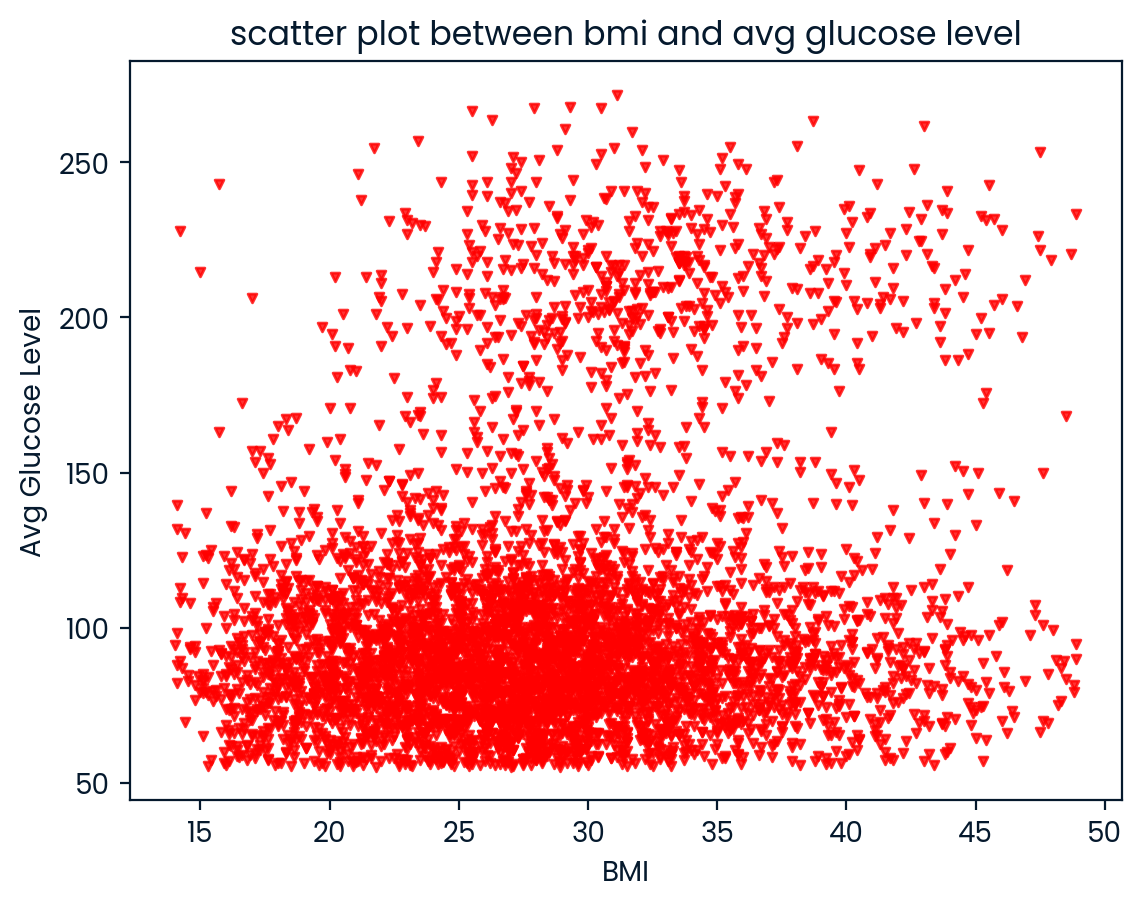

In [22]:
df.plot.scatter(x = 'bmi', y = 'avg_glucose_level', alpha = 0.8, color = 'red', s=10, marker = "v",
                title = 'scatter plot between bmi and avg glucose level',
                xlabel = 'BMI', ylabel = 'Avg Glucose Level')

## **2. Bar plot - It can be created using summarized data**
- df.plot(x = 'col1', y = 'col2', kind = 'bar')
- df.plot.bar(x = 'col1', y = 'col2')

In [7]:
# Summarize the data by work type. The summarized data is sorted in decreasing order by values
# The index of the data frame is work_type
df_summ = df.groupby(['work_type'])['heart_disease'].agg('sum').sort_values(ascending=False)
df_summ.head()

work_type
Private          157
Self-employed     81
Govt_job          36
children           1
Name: heart_disease, dtype: int64

<Axes: title={'center': 'Heart Disease by Work Type'}, xlabel='Work Type', ylabel='Count'>

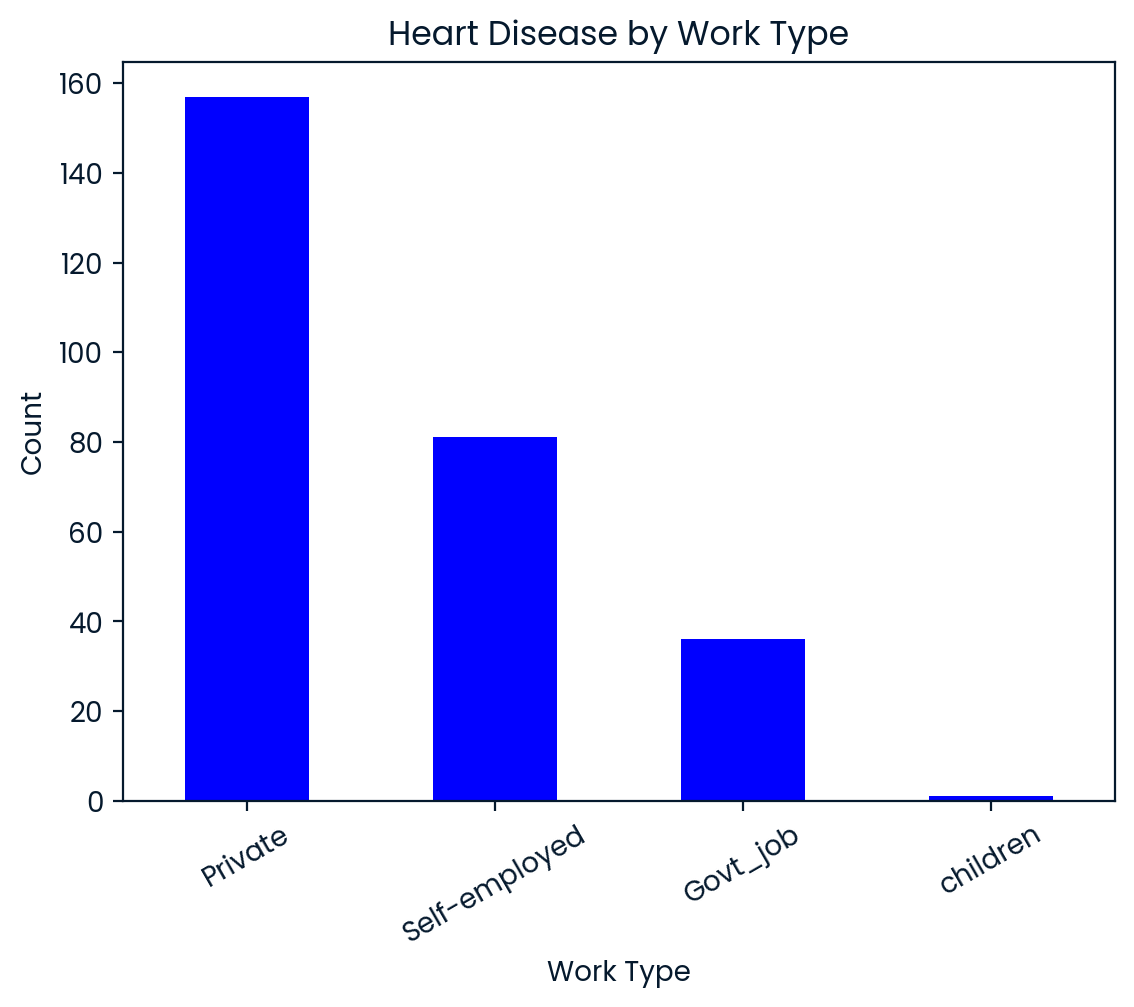

In [8]:
# Plot the summarized data as bar plot
# The index is used as x-axis
# The column is used as y-axis
df_summ.plot(kind = 'bar', color = 'blue',
             title = 'Heart Disease by Work Type',
             xlabel = 'Work Type', ylabel = 'Count',
             rot = 30)

<Axes: title={'center': 'Heart Disease by Work Type'}, xlabel='Work Type', ylabel='Count'>

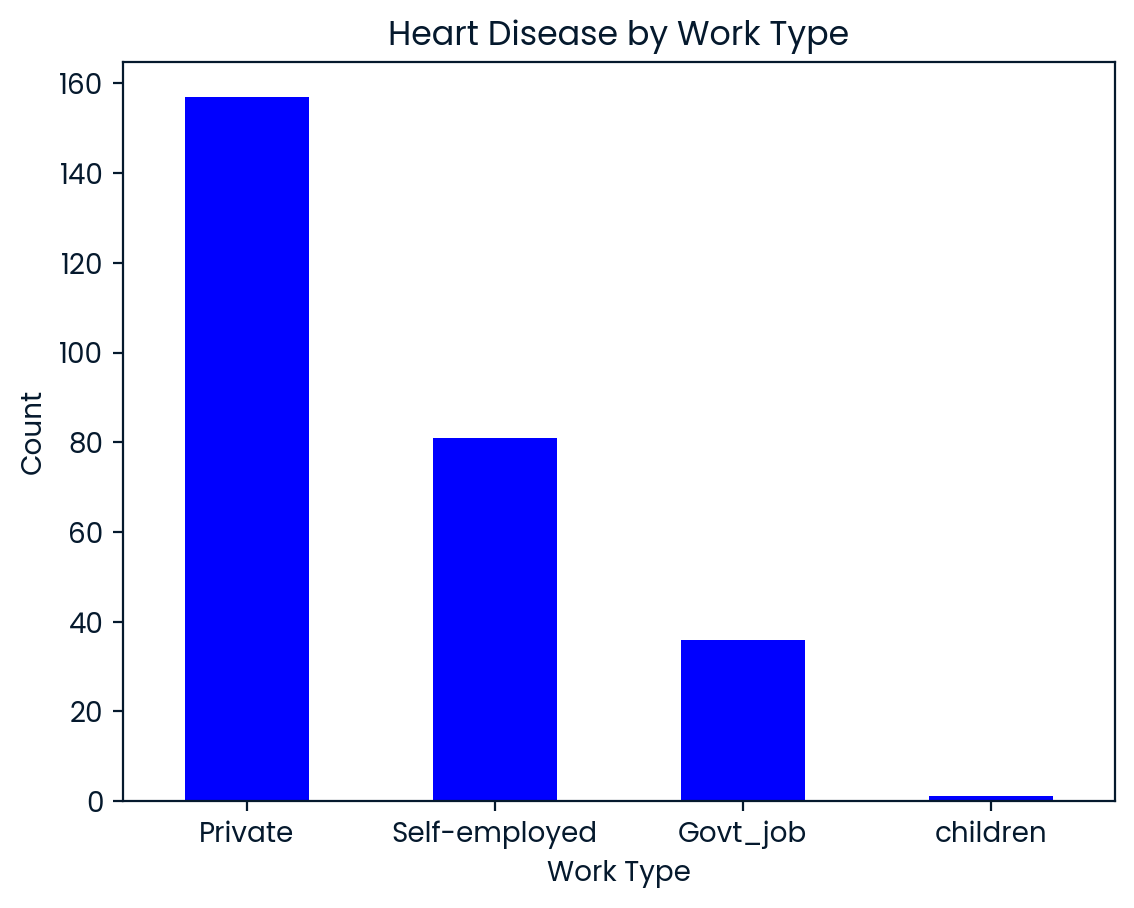

In [9]:
# Plot the summarized data as bar plot
# The index is used as x-axis
# The column is used as y-axis
df_summ.plot.bar(color = 'blue',
             title = 'Heart Disease by Work Type',
                xlabel = 'Work Type', ylabel = 'Count',
                 rot = 0)

## **3. Horizontal Bar plot - It can be created on summarised data using**
- df.plot(x = 'col1', y = 'col2', kind = 'barh')
- df.plot.barh(x = 'col1', y = 'col2')

In [10]:
# Summarize the data by work type. The summarized data is sorted in ascending order by values
# The index of the data frame is work_type
df_summ = df.groupby(['work_type'])['heart_disease'].agg('sum').sort_values(ascending=True)
df_summ.head()

work_type
children           1
Govt_job          36
Self-employed     81
Private          157
Name: heart_disease, dtype: int64

<Axes: title={'center': 'Heart Disease by Work Type'}, xlabel='Work Type', ylabel='Count'>

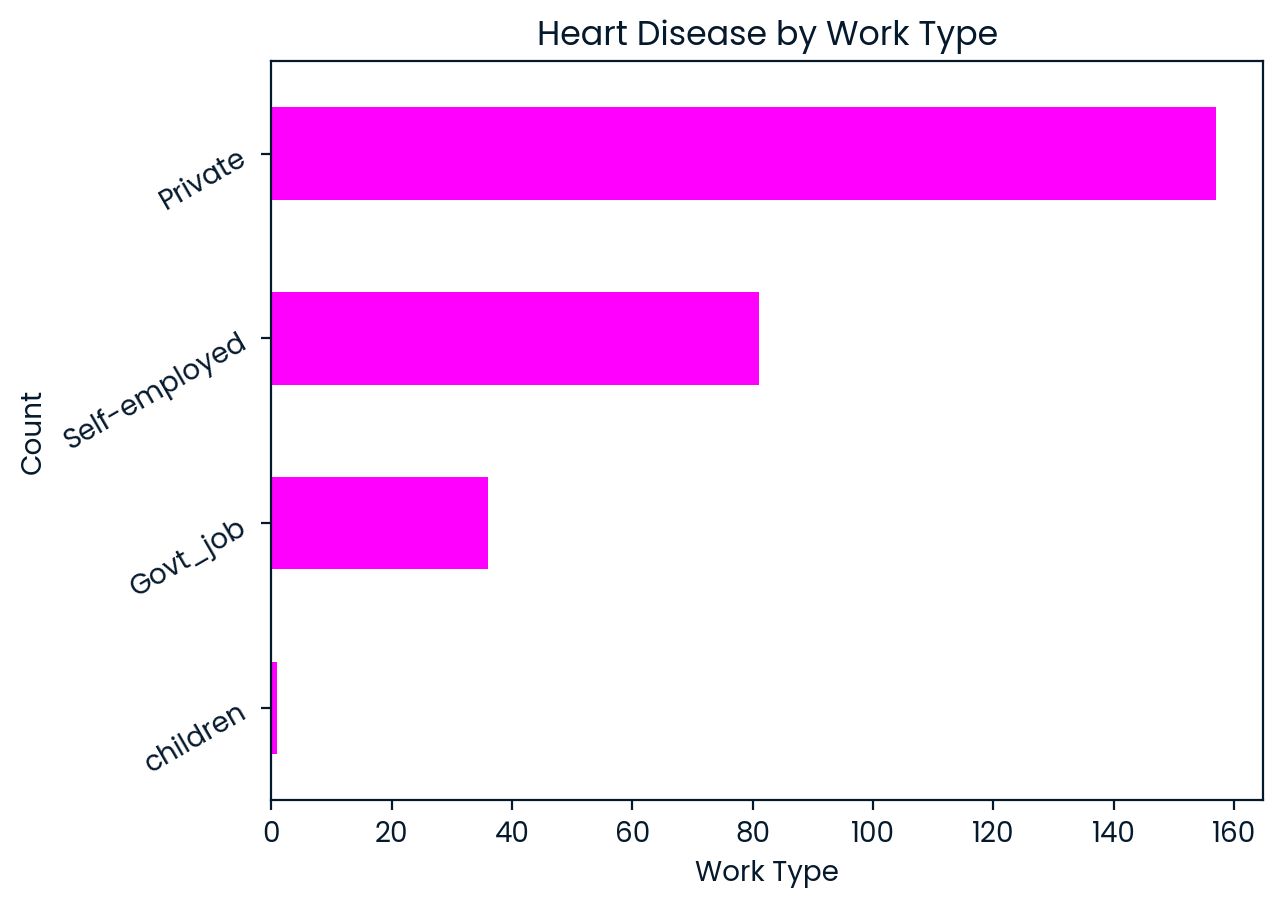

In [11]:
# Plot the summarised data as horizontal bar plot
# The index is used as y-axis
# The column is used as x-axis
df_summ.plot(kind = 'barh', color = 'magenta',
             title = 'Heart Disease by Work Type',
             xlabel = 'Work Type', ylabel = 'Count',
             rot  = 30)

## **4. Stacked/Dodged  Bar Plot - It can be created by summarizing the data and unstacking the summarized data**

In [12]:
# Summarize the data by Work Type and Gender
# Unstack to get separate columns for Female and Male

df_summ = df.groupby(['work_type', 'gender'])['heart_disease'].agg('sum')

df_summ = df_summ.unstack()

df_summ

gender,Female,Male
work_type,,
Govt_job,13,23
Private,67,90
Self-employed,32,49
children,0,1


### Stacked Bar plot

<Axes: title={'center': 'Heart Disease by Work Type for Female and Male'}, xlabel='Work Type', ylabel='Count'>

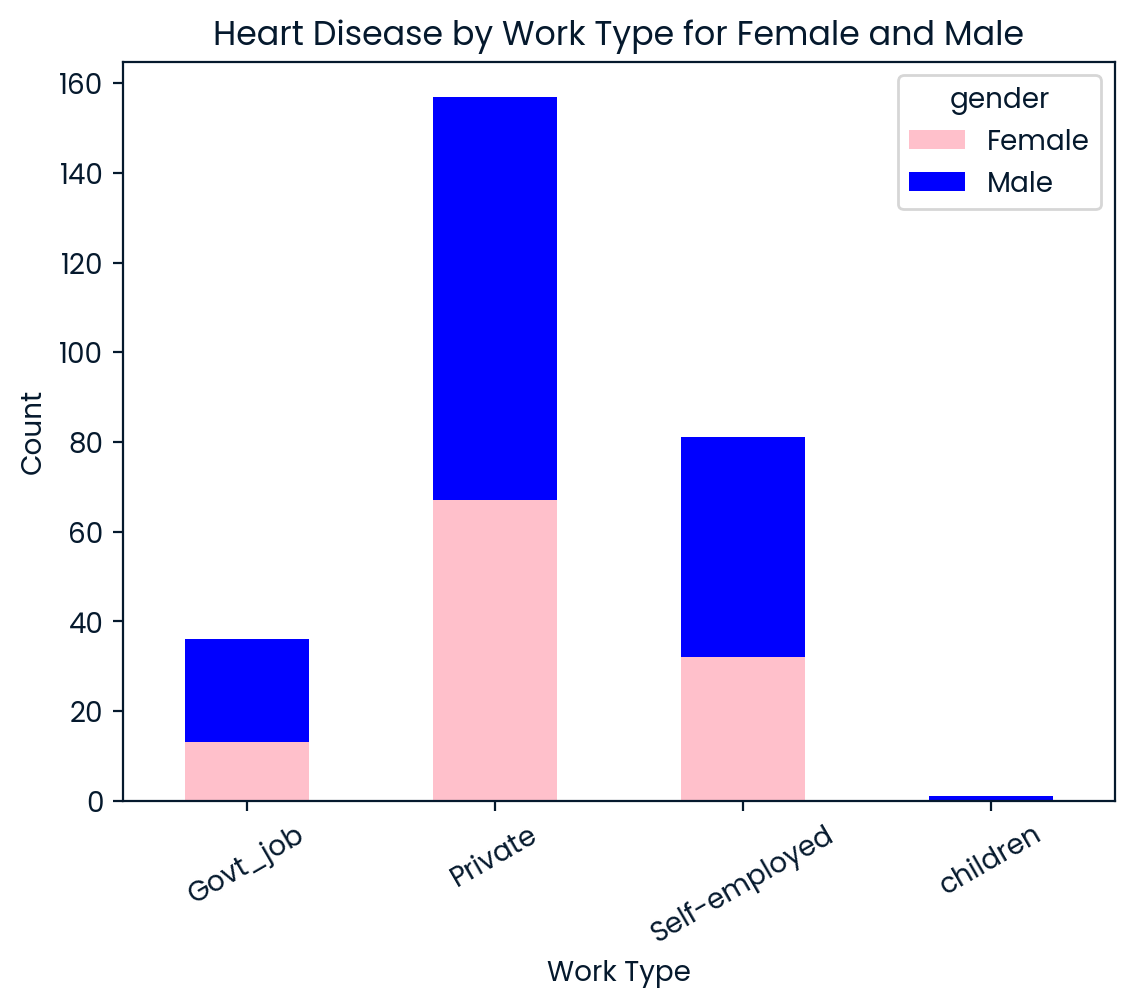

In [13]:
# Plotting the unstacked summarized data
# stacked = True stacks the bars
df_summ.plot(kind = 'bar', color = {"Male":"blue", "Female":"pink"}, stacked = True,
title = 'Heart Disease by Work Type for Female and Male',
xlabel = 'Work Type', ylabel = 'Count',
rot  = 30)

### **Dodged Bar plot**

<Axes: title={'center': 'Heart Disease by Work Type for Female and Male'}, xlabel='Work Type', ylabel='Count'>

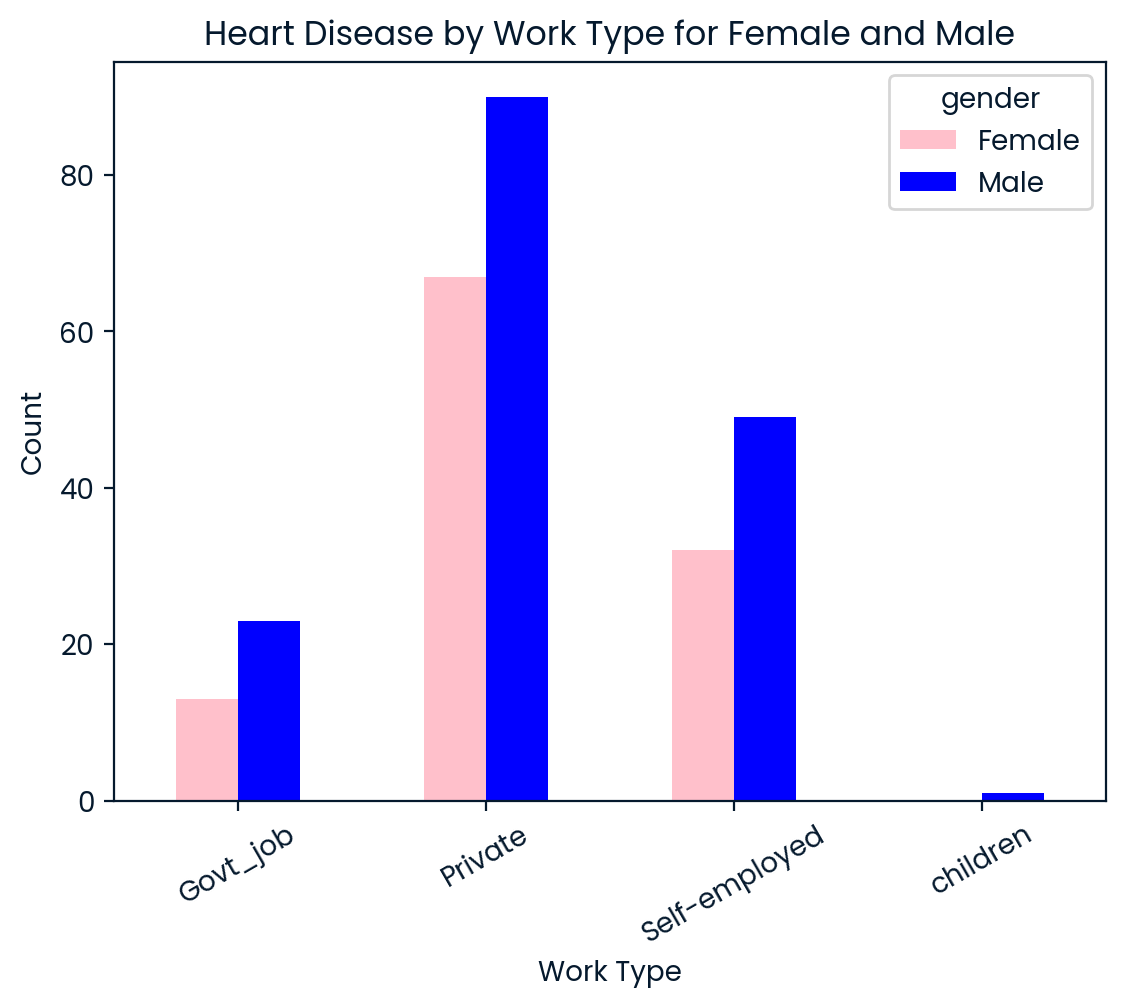

In [14]:
# Plotting the unstacked summarised data
df_summ.plot(kind = 'bar', color = {"Male":"blue", "Female":"pink"}, stacked = False,
title = 'Heart Disease by Work Type for Female and Male',
xlabel = 'Work Type', ylabel = 'Count',
rot  = 30)

### **Subplots**

array([<Axes: title={'center': 'Female'}, xlabel='Work Type', ylabel='Count'>,
       <Axes: title={'center': 'Male'}, xlabel='Work Type', ylabel='Count'>],
      dtype=object)

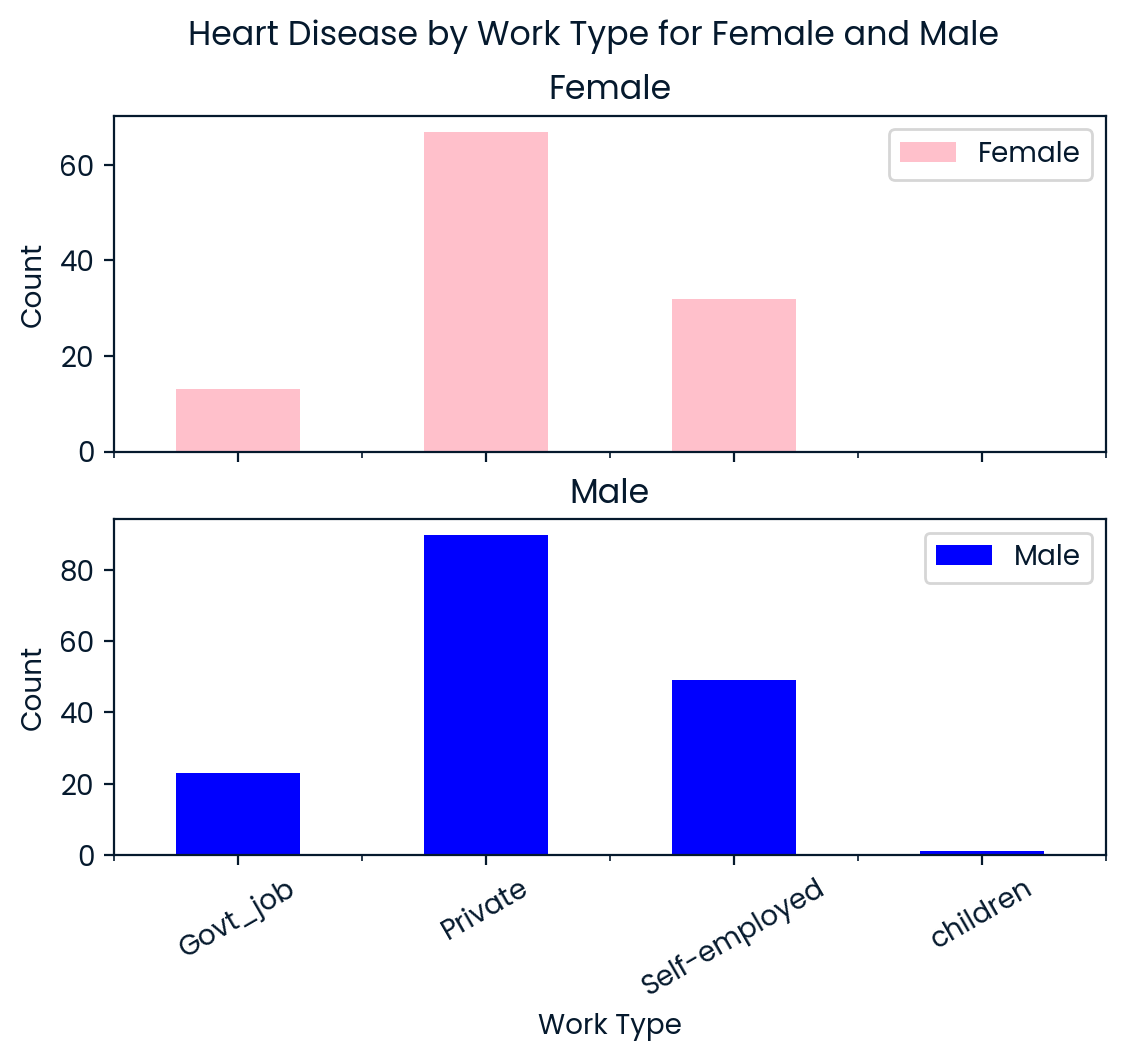

In [15]:
# Plotting the unstacked summarised data
df_summ.plot(kind = 'bar', color = {"Male":"blue", "Female":"pink"}, subplots = True,
title = 'Heart Disease by Work Type for Female and Male',
xlabel = 'Work Type', ylabel = 'Count',
rot  = 30)

### **100% Stacked Bar plot**

In [16]:
# 100% Stacked
# Summarize the data by Calculating Sum of heart disease by Work Type and Gender
# Unstack to get separate columns for Female and Male
df_summ = df.groupby(['work_type', 'gender'])['heart_disease'].agg('sum')
df_summ = df_summ.unstack()
#Create a new column with total for male and female
df_summ['All'] = df_summ['Female'] + df_summ['Male']
# Percentage for Male and Female
df_summ['Male_perc'] = df_summ['Male']/df_summ['All']*100
df_summ['Female_perc'] = df_summ['Female']/df_summ['All']*100
df_summ

gender,Female,Male,All,Male_perc,Female_perc
work_type,,,,,
Govt_job,13,23,36,63.888889,36.111111
Private,67,90,157,57.324841,42.675159
Self-employed,32,49,81,60.493827,39.506173
children,0,1,1,100.000000,0.000000


<Axes: title={'center': 'Heart Disease % by Work Type for Female and Male'}, xlabel='Work Type', ylabel='Count'>

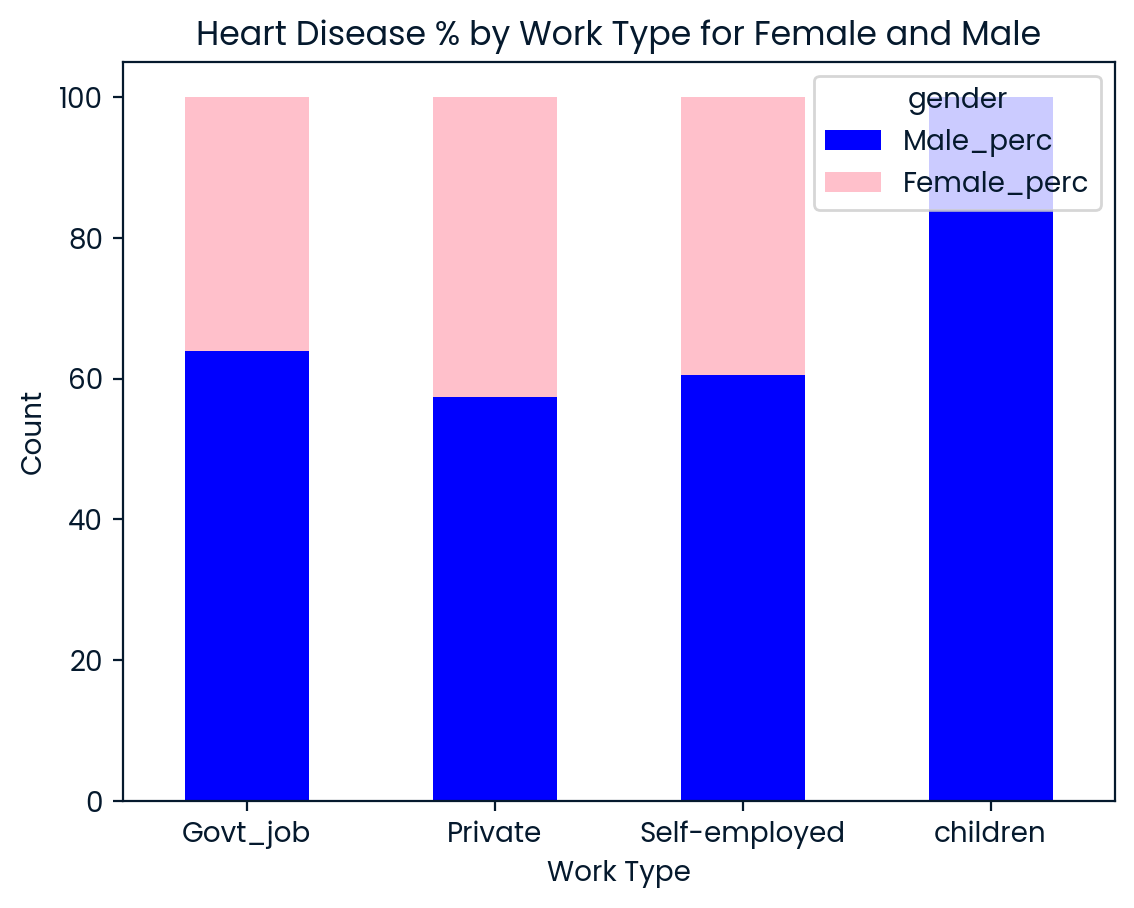

In [17]:
# Plotting the unstacked summarized data
# stacked = True stacks the bars
df_summ[['Male_perc', 'Female_perc']].plot(kind = 'bar', color = {"Male_perc":"blue", "Female_perc":"pink"}, stacked = True,
             title = 'Heart Disease % by Work Type for Female and Male',
             xlabel = 'Work Type', ylabel = 'Count',
             rot  = 0)

## **5. Histogram - Select the column of the dataframe for histogram and plot using**
- df['age'].plot(kind = 'hist', bins = 30) or
- df['age'].plot.hist(bins = 30)

<Axes: title={'center': 'Histogram of age for bins 30'}, ylabel='Frequency'>

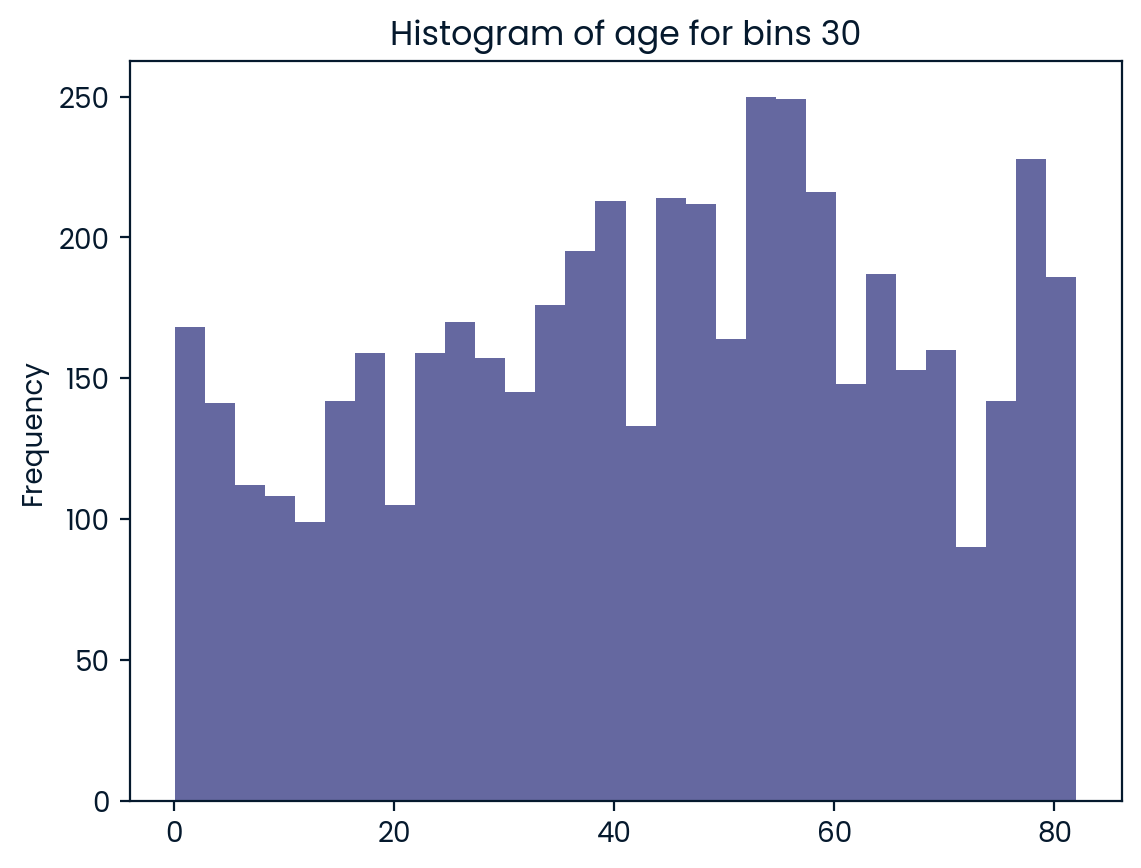

In [18]:
df['age'].plot(kind = 'hist', bins = 30, title = 'Histogram of age for bins 30')

<Axes: ylabel='Frequency'>

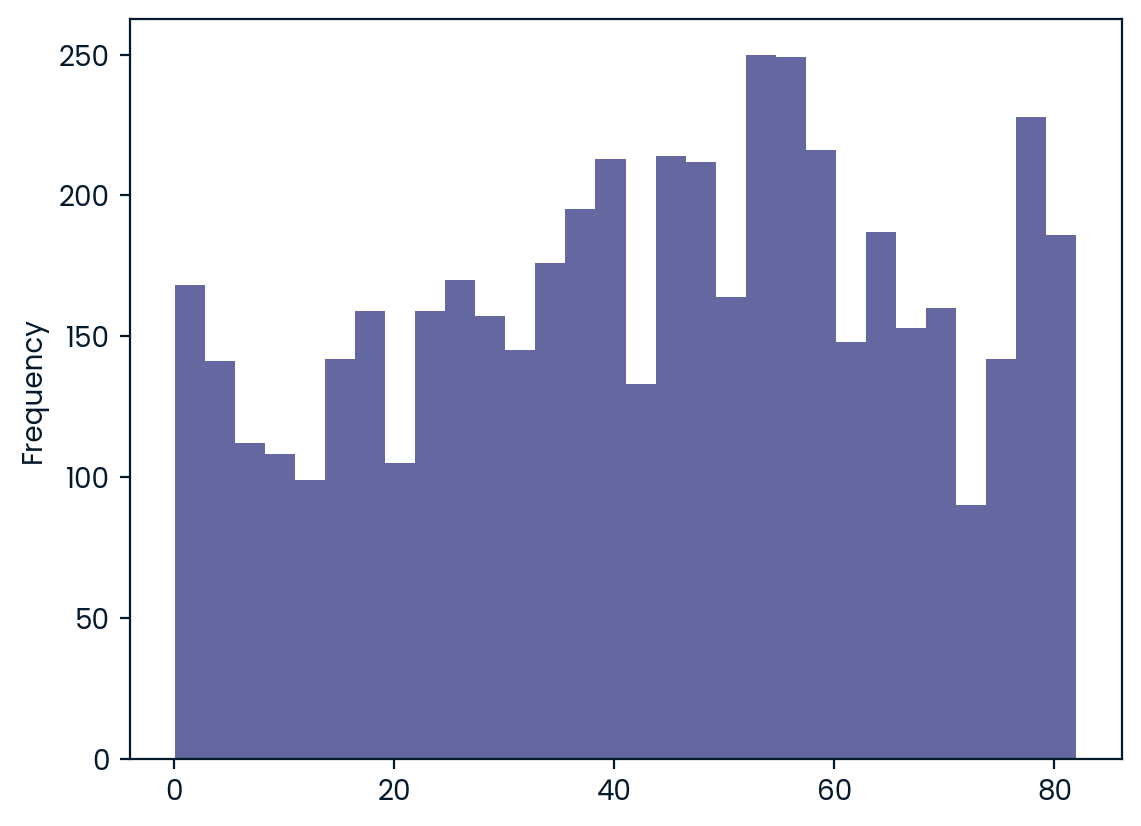

In [19]:
df['age'].plot.hist(bins = 30)

## **6. Box- Select the column of the dataframe for box plot and plot using**
- df['age'].plot(kind = 'box') or
- df['age'].plot.box()

<Axes: >

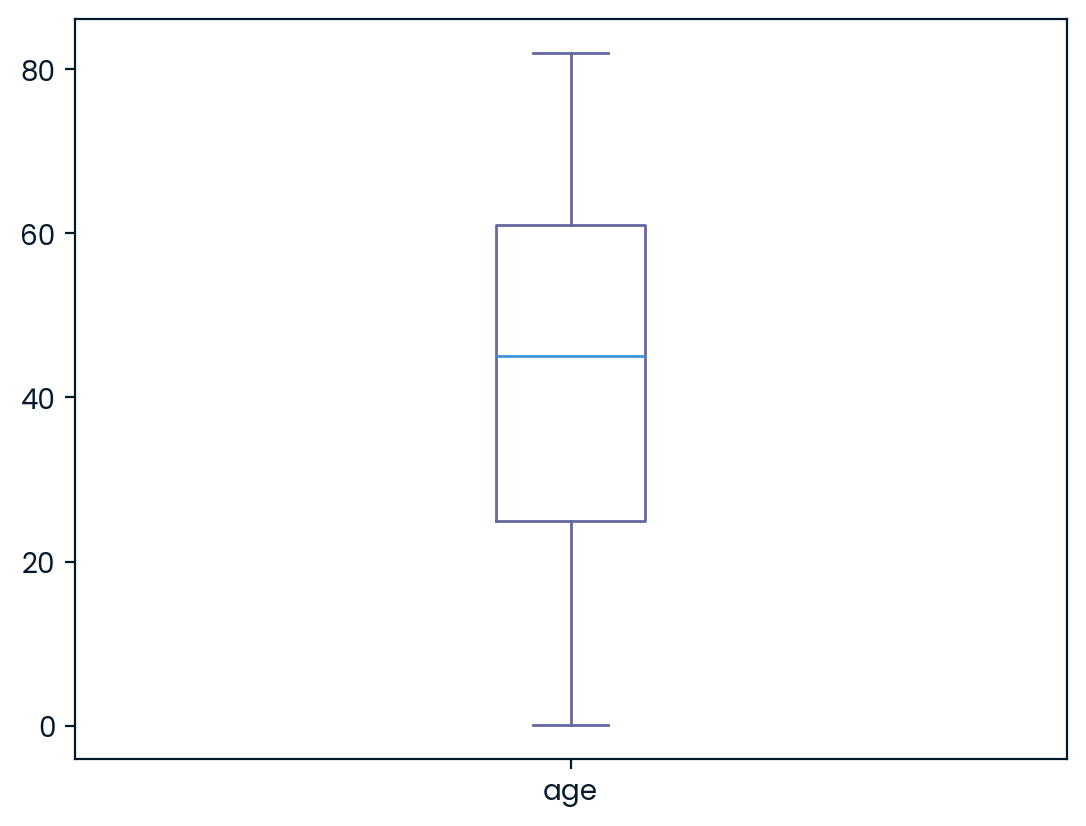

In [20]:
df['age'].plot(kind = 'box')